# 02 - Train Aggressive DQN Agent

**This agent is tuned for FREQUENT trading and demonstration:**

- 🔥 **Lower transaction costs** (2 bps vs 10 bps)
- 🎯 **PnL reward** (immediate feedback)
- 🚀 **Higher learning rate** (faster adaptation)
- 📈 **More exploration** (tries more actions)
- 💹 **QQQ** (more volatile than SPY)

**Result: An agent that trades MORE and is better for demos!**

---

In [2]:
# Imports
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import torch
import warnings
warnings.filterwarnings('ignore')

from train_agent_aggressive import train_aggressive_agent

print("✓ Imports successful")

# Check device
if torch.xpu.is_available():
    device = 'xpu'
    print(f"✓ Using Intel XPU: {torch.xpu.get_device_name(0)}")
elif torch.cuda.is_available():
    device = 'cuda'
    print(f"✓ Using CUDA GPU")
else:
    device = 'cpu'
    print("Using CPU")

✓ Imports successful
✓ Using Intel XPU: Intel(R) Arc(TM) Graphics


## Load QQQ Data

In [3]:
print("Loading QQQ data...")
data = pd.read_parquet('demo_data/featured_data.parquet')

print(f"✓ Loaded {len(data)} days")
print(f"  Date range: {data.index[0]} to {data.index[-1]}")

Loading QQQ data...
✓ Loaded 3574 days
  Date range: 2010-10-18 00:00:00 to 2024-12-30 00:00:00


## Split Data

In [4]:
# Use recent period as test (2022+)
test_start = pd.Timestamp('2022-01-01')

train_val_data = data[data.index < test_start].copy()
test_data = data[data.index >= test_start].copy()

# 85/15 split for train/val
train_size = int(len(train_val_data) * 0.85)
train_data = train_val_data.iloc[:train_size]
val_data = train_val_data.iloc[train_size:]

print("Data splits:")
print(f"  Train: {len(train_data):5d} days | {train_data.index[0].date()} to {train_data.index[-1].date()}")
print(f"  Val:   {len(val_data):5d} days | {val_data.index[0].date()} to {val_data.index[-1].date()}")
print(f"  Test:  {len(test_data):5d} days | {test_data.index[0].date()} to {test_data.index[-1].date()}")

Data splits:
  Train:  2398 days | 2010-10-18 to 2020-04-28
  Val:     424 days | 2020-04-29 to 2021-12-31
  Test:    752 days | 2022-01-03 to 2024-12-30


## Define Features

In [5]:
features = [
    'return_1d', 'return_5d', 'return_10d',
    'rsi', 'rsi_norm', 'macd', 'macd_signal', 'macd_diff',
    'sma_50', 'sma_200', 'sma_crossover', 'ema_12', 'ema_26',
    'bb_high', 'bb_low', 'bb_width', 'bb_percent', 'atr', 'atr_pct',
    'volume_ratio', 'obv'
]

print(f"Using {len(features)} features")

Using 21 features


## Train Aggressive Agent! 🔥

**This will take 15-40 minutes depending on hardware.**

Watch the plots update live below!

**TensorBoard:** Open another terminal and run:
```bash
tensorboard --logdir=demo_logs
```
Then go to: http://localhost:6006

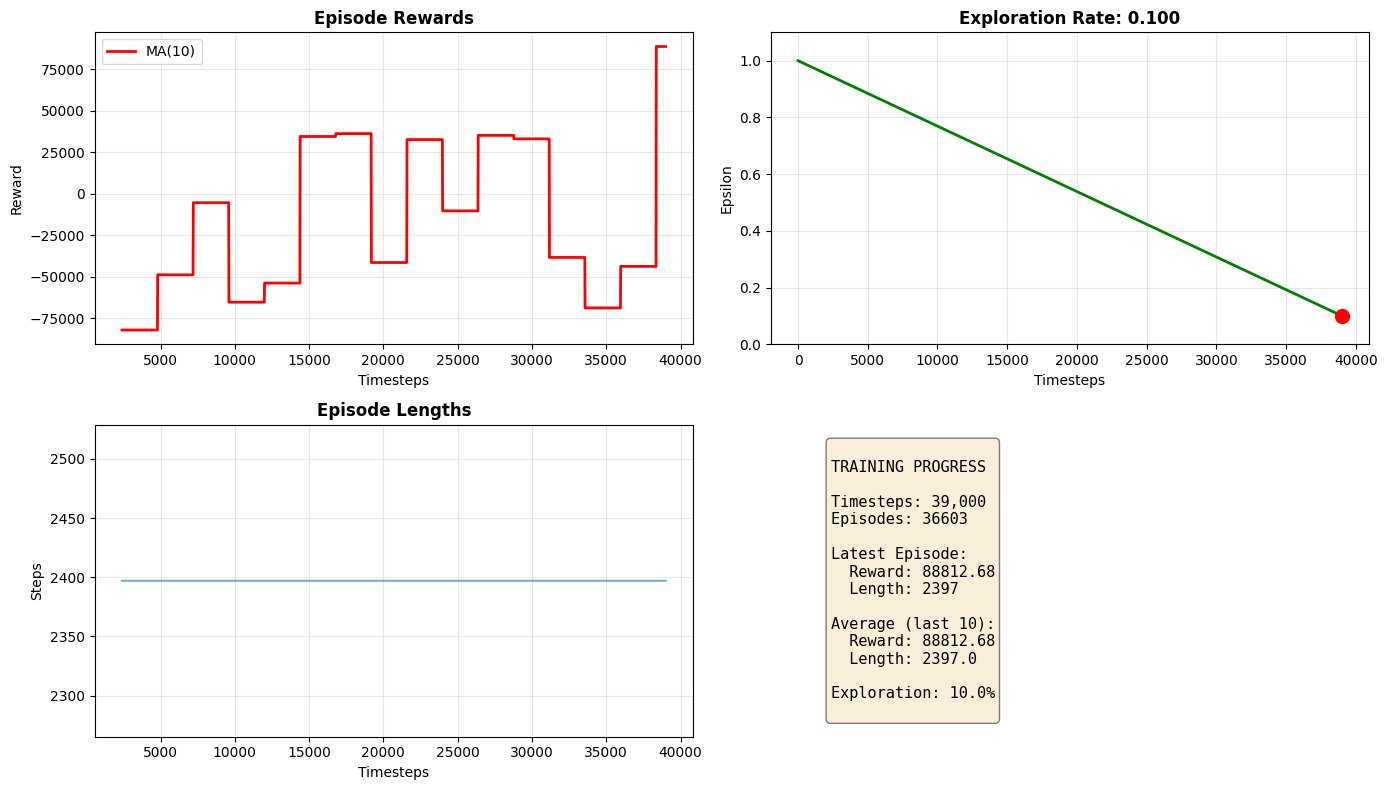

Eval num_timesteps=39000, episode_reward=79002.73 +/- 0.00

Episode length: 423.00 +/- 0.00


✅ AGGRESSIVE TRAINING COMPLETE!
  Episodes: 37603
  Best model: demo_models/aggressive_agent/best_model.zip
  Final model: demo_models/aggressive_agent/final_model.zip

This agent should trade MORE FREQUENTLY than the conservative one!

🎉 Training complete!


In [6]:
# Train!
model, callback = train_aggressive_agent(
    train_data=train_data,
    val_data=val_data,
    features=features,
    device=device,
    total_timesteps=40000,  # More training for aggressive agent
    plot_freq=1500
)

print("\n🎉 Training complete!")

## Training Summary

TRAINING SUMMARY
Total episodes: 37603
Total timesteps: 40,000

First 10 episodes avg reward: -82219.23
Last 10 episodes avg reward: 88812.68
Improvement: 171031.92

Models saved:
  - demo_models/aggressive_agent/best_model.zip
  - demo_models/aggressive_agent/final_model.zip


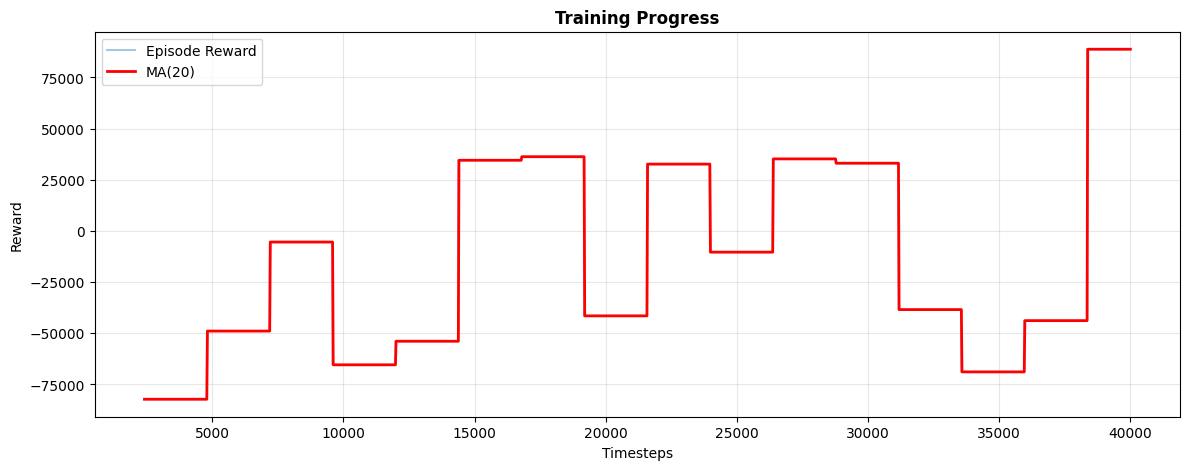

In [8]:
import matplotlib.pyplot as plt

print("TRAINING SUMMARY")
print("="*70)
print(f"Total episodes: {len(callback.episode_rewards)}")
print(f"Total timesteps: {callback.timesteps[-1] if callback.timesteps else 0:,}")
print()
print(f"First 10 episodes avg reward: {np.mean(callback.episode_rewards[:10]):.2f}")
print(f"Last 10 episodes avg reward: {np.mean(callback.episode_rewards[-10:]):.2f}")
print(f"Improvement: {np.mean(callback.episode_rewards[-10:]) - np.mean(callback.episode_rewards[:10]):.2f}")
print()
print("Models saved:")
print("  - demo_models/aggressive_agent/best_model.zip")
print("  - demo_models/aggressive_agent/final_model.zip")

# Plot
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(callback.timesteps, callback.episode_rewards, alpha=0.4, label='Episode Reward')
if len(callback.episode_rewards) > 20:
    ma = pd.Series(callback.episode_rewards).rolling(20).mean()
    ax.plot(callback.timesteps, ma, 'r-', linewidth=2, label='MA(20)')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Reward')
ax.set_title('Training Progress', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

## Next Steps

Now test the agent on fresh data:

```bash
python predict_live.py
```

This will:
1. Download the **latest** QQQ data from Yahoo Finance
2. Run the trained agent on it
3. Show you what decisions it makes **right now**!

Perfect for demonstrations! 🚀